In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('Company_Data.csv')
print(df.dtypes)
df.head(10)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


Text(0, 0.5, 'Sales')

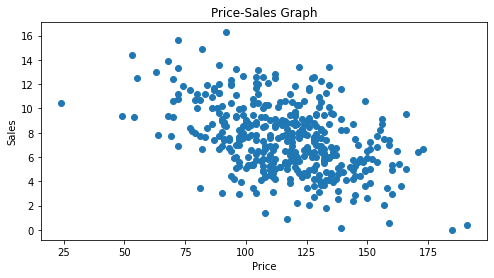

In [3]:
plt.figure(figsize=(8,4))
plt.scatter(x=df.Price, y=df.Sales)
plt.title("Price-Sales Graph")
plt.xlabel("Price")
plt.ylabel("Sales")

In [4]:
df.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
390,5.47,108,75,9,61,111,Medium,67,12,Yes,Yes
391,6.10,153,63,0,49,124,Bad,56,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
394,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
print(df.dtypes)
print(df.isnull().sum())
df.describe(include='all')

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [6]:
#converts the sales column values into high and low categories
def rate_sales(x):
    if x >= 7:
        return 'High'
    else:
        return 'Low'

df['Sales'] = df.Sales.apply(rate_sales) 
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,High,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,High,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


<AxesSubplot:xlabel='Sales', ylabel='count'>

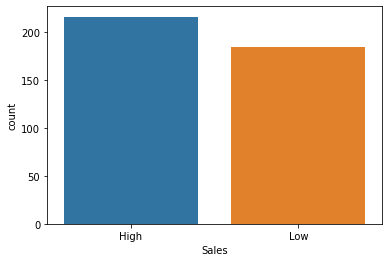

In [7]:
# dataset is balanced
sns.countplot(df['Sales'])

In [8]:
#will convert the cols having object type to binary format
# will convert cols like urban, US, shelveloc to int dtype
le = LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
            df[column_name]  = le.fit_transform(df[column_name])
    else:
        pass

In [9]:
df.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
5,0,124,113,13,501,72,0,78,16,0,1
6,1,115,105,0,45,108,2,71,15,1,0
7,0,136,81,15,425,120,1,67,10,1,1
8,1,132,110,0,108,124,2,76,10,0,0
9,1,132,113,0,131,124,2,76,17,0,1


<AxesSubplot:xlabel='Sales', ylabel='count'>

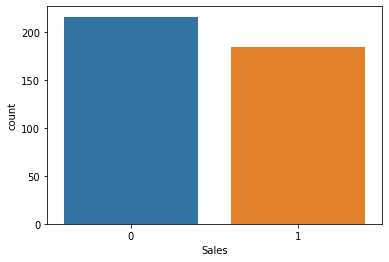

In [10]:
# 0 represents High sales
# 1 represents low sales
sns.countplot(df['Sales'])

In [11]:
print(df.dtypes)
df.describe(include='all')

Sales          int32
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.460000,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,0.499022,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,0.000000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,0.000000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,1.000000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,1.000000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [12]:
x = df.iloc[:,1:]
y = df[['Sales']]
print(y)
x

     Sales
0        0
1        0
2        0
3        0
4        1
..     ...
395      0
396      1
397      0
398      1
399      0

[400 rows x 1 columns]


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
# Scaling i/p
scaler = StandardScaler()
x_transformed = scaler.fit_transform(x) #passing input

# only for checking whether the data is transformed or not
# checking display for mean=0 and SD =1
colsname = {'CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'}
x_transformed_display = pd.DataFrame(x_transformed,columns=colsname)
print(x_transformed_display.std())
print(x_transformed_display.mean())

Population     1.001252
US             1.001252
Education      1.001252
Age            1.001252
CompPrice      1.001252
Urban          1.001252
Advertising    1.001252
Income         1.001252
Price          1.001252
ShelveLoc      1.001252
dtype: float64
Population     3.483325e-16
US             5.162537e-17
Education     -6.161738e-17
Age            1.454392e-16
CompPrice     -6.994405e-17
Urban         -2.192690e-17
Advertising    1.786071e-16
Income        -2.534084e-16
Price          2.697842e-16
ShelveLoc     -8.160139e-17
dtype: float64


In [14]:
# Model building Training, Testing - without Scaling
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 1, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# training the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

# predicting Sales
y_pred_train = rf_model.predict(x_train) # for training data
y_pred_test  = rf_model.predict(x_test) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test)) #test data
print(confusion_matrix(y_test,y_pred_test))

(320, 10)
(80, 10)
(320, 1)
(80, 1)
Accuracy score Training =  1.0
Accuracy score Test     =  0.775
F1 score                =  0.7692307692307694
[[32 11]
 [ 7 30]]


In [15]:
# Model building Training, Testing - with Scaling
x_train_scaled,x_test_scaled,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20, random_state = 1,stratify=y)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

# training the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled,y_train)

# predicting Sales
y_pred_train_scaled = rf_model.predict(x_train_scaled) # for training data
y_pred_test_scaled  = rf_model.predict(x_test_scaled) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train_scaled)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test_scaled)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test_scaled)) #test data
print(confusion_matrix(y_test,y_pred_test_scaled))

(320, 10)
(80, 10)
(320, 1)
(80, 1)
Accuracy score Training =  1.0
Accuracy score Test     =  0.7875
F1 score                =  0.7848101265822786
[[32 11]
 [ 6 31]]


In [16]:
# Model optimization - GradientSearchCV
rf_model = RandomForestClassifier()
rf_model_tweaked = GridSearchCV(estimator= rf_model, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'min_samples_split' : [2,3,4,5],
                                                                     'min_samples_leaf' : [1,2,4],
                                                                     'max_features':['auto', 'sqrt'],
                                                                      'bootstrap': [True, False]
                                                                   })
rf_model_tweaked.fit(x_train,y_train)
print(rf_model_tweaked.best_params_)
print(rf_model_tweaked.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
0.84375


In [17]:
# using GradientSearchCV params - without scaled i/p
# training the model
rf_model = RandomForestClassifier(bootstrap= True, criterion='entropy', max_depth = 7, max_features ='auto',
                                    min_samples_leaf = 4, min_samples_split = 3)
rf_model.fit(x_train,y_train)

# predicting Sales
y_pred_train = rf_model.predict(x_train) # for training data
y_pred_test  = rf_model.predict(x_test) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test)) #test data
print(confusion_matrix(y_test,y_pred_test))

Accuracy score Training =  0.965625
Accuracy score Test     =  0.75
F1 score                =  0.7297297297297297
[[33 10]
 [10 27]]


In [18]:
# using GradientSearchCV params - with scaled i/p
# training the model
rf_model = RandomForestClassifier(bootstrap= True, criterion='entropy', max_depth = 7, max_features ='auto',
                                    min_samples_leaf = 4, min_samples_split = 3)
rf_model.fit(x_train_scaled,y_train)

# predicting Sales
y_pred_train_scaled = rf_model.predict(x_train_scaled) # for training data
y_pred_test_scaled  = rf_model.predict(x_test_scaled) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train_scaled)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test_scaled)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test_scaled)) #test data
print(confusion_matrix(y_test,y_pred_test_scaled))

Accuracy score Training =  0.965625
Accuracy score Test     =  0.7875
F1 score                =  0.7605633802816901
[[36  7]
 [10 27]]


In [19]:
rf_importance = rf_model.feature_importances_
FIM = pd.DataFrame({'Features':x.columns,'RandomForest Feature Importance' : rf_importance})
FIM = FIM.sort_values(by='RandomForest Feature Importance', ascending = False)
FIM
# FIM['Feature Importance'].sum()

,Features,RandomForest Feature Importance
4,Price,0.257440
5,ShelveLoc,0.166080
6,Age,0.136831
2,Advertising,0.105911
0,CompPrice,0.104383
1,Income,0.097812
3,Population,0.068121
7,Education,0.041633
8,Urban,0.012554
9,US,0.009236


Text(0, 0.5, 'Features')

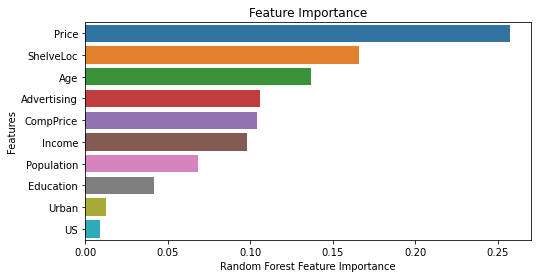

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x= 'RandomForest Feature Importance', y='Features', data = FIM)
plt.title('Feature Importance')
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Features')